In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [43]:
df = pd.read_csv("WineQT.csv")

In [44]:
if 'Id' in df.columns:
    df = df.drop(columns=['Id'])

In [45]:
info = df.info()
desc = df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 107.3 KB


In [46]:
missing = df.isnull().sum()
duplicates = df.duplicated().sum()

In [47]:
target_counts = df['quality'].value_counts().sort_index()

In [48]:
corr = df.corr()

In [49]:
corr_with_quality = corr['quality'].drop('quality').abs().sort_values(ascending=False)
top_features = list(corr_with_quality.head(6).index)


<Figure size 1200x1000 with 0 Axes>

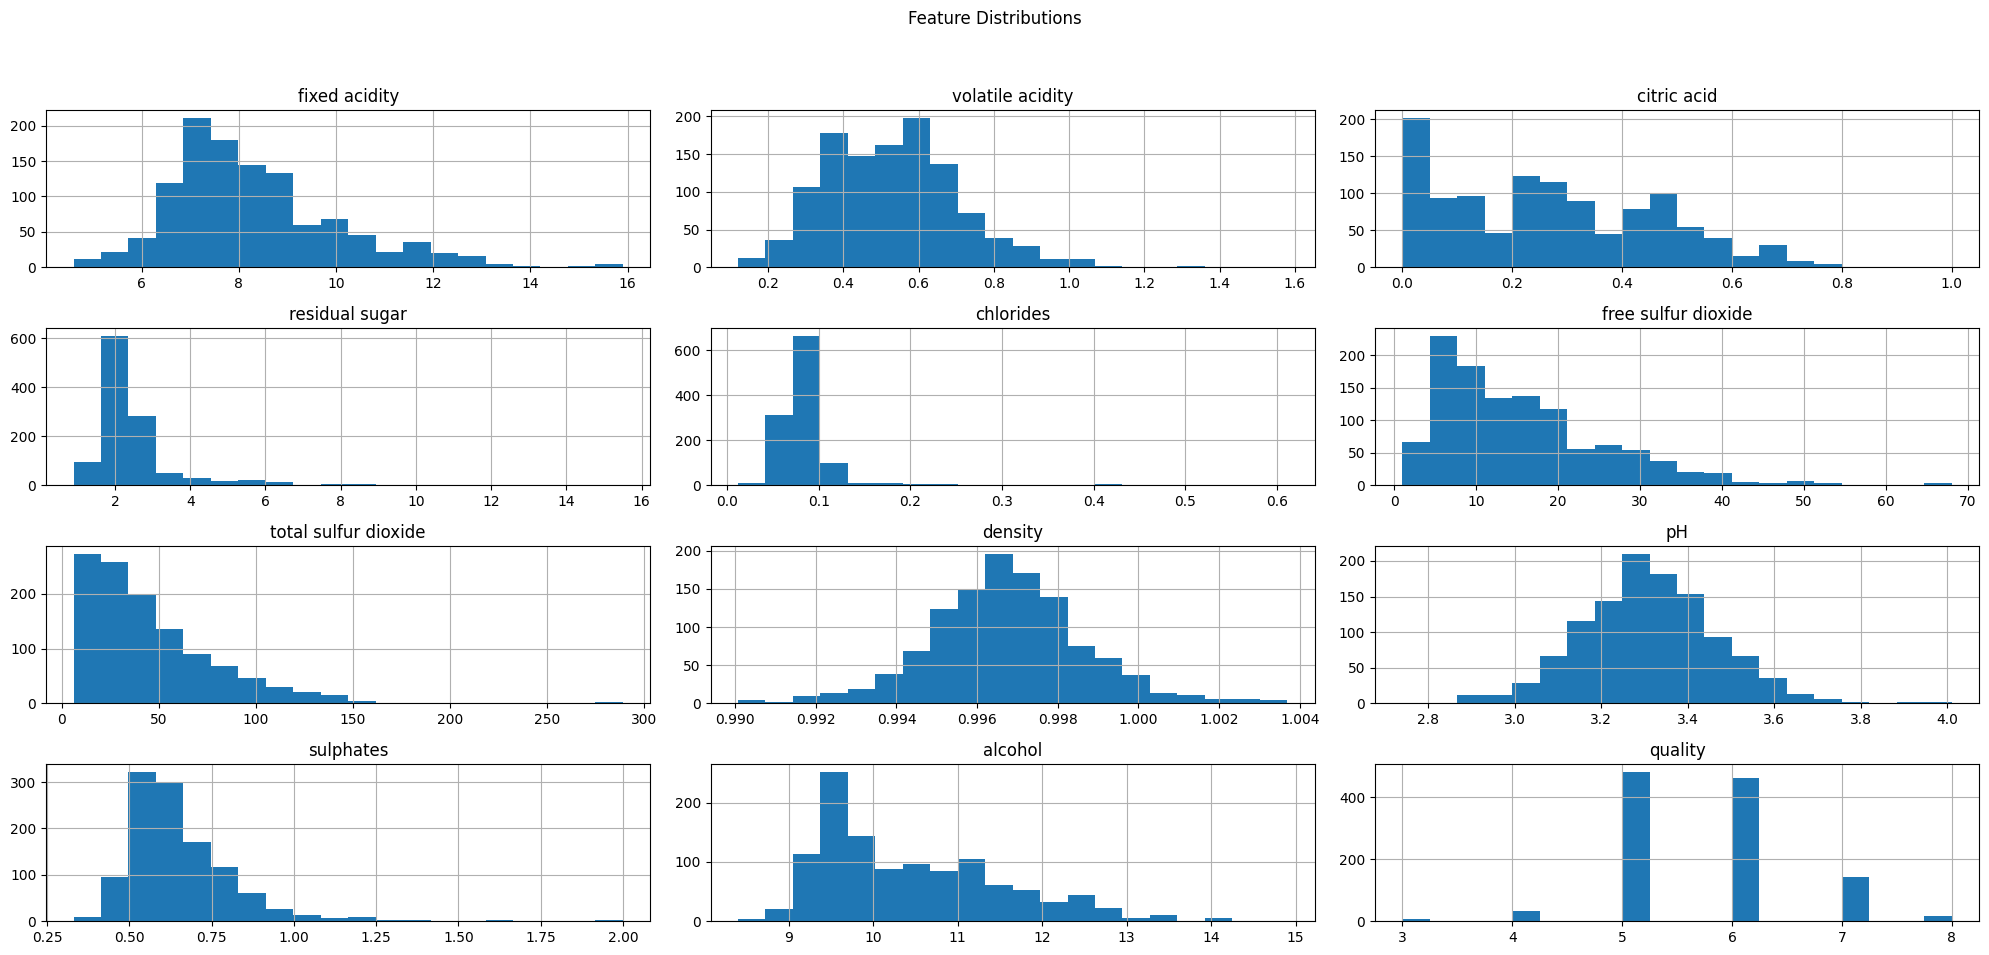

In [50]:
plt.figure(figsize=(12, 10))
df.hist(bins=20, layout=(4,3), figsize=(20,10))
plt.suptitle('Feature Distributions')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

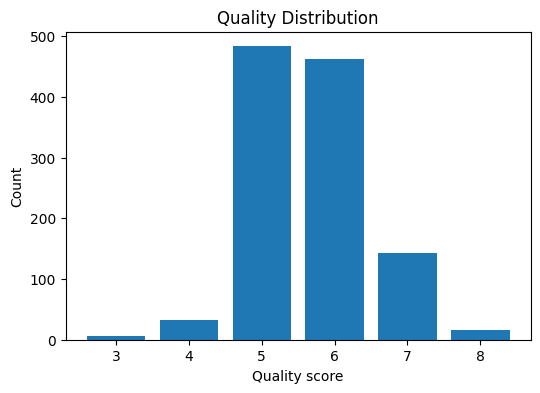

In [51]:
plt.figure(figsize=(6,4))
plt.bar(target_counts.index.astype(str), target_counts.values)
plt.title('Quality Distribution')
plt.xlabel('Quality score')
plt.ylabel('Count')
plt.show()

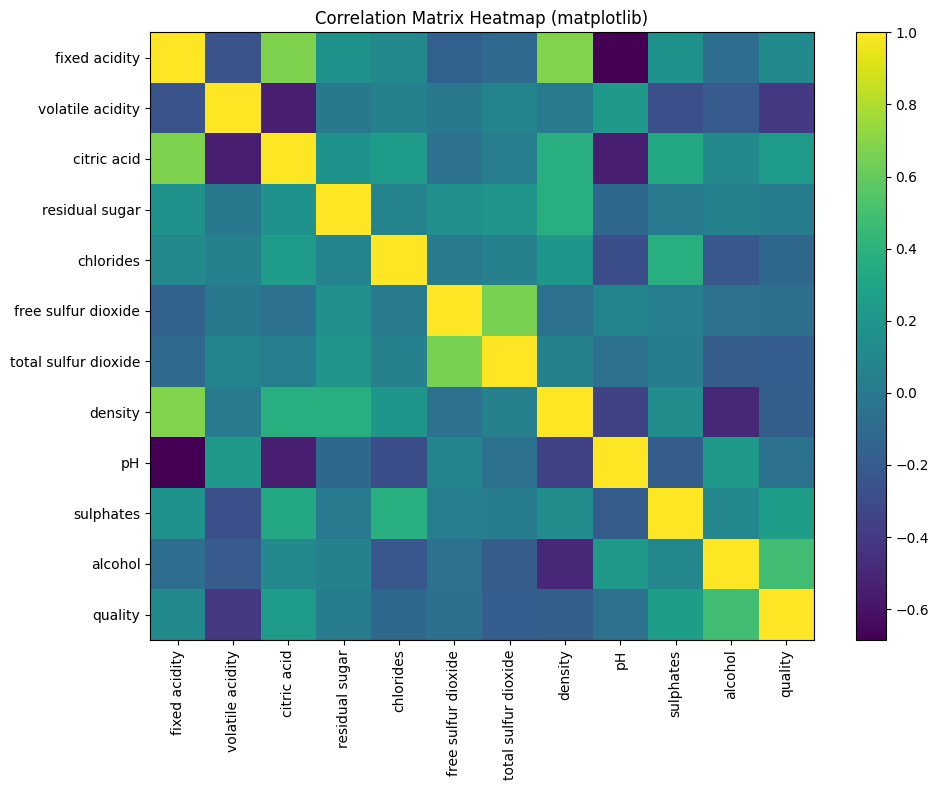

In [52]:
plt.figure(figsize=(10,8))
plt.imshow(corr, interpolation='nearest', aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title('Correlation Matrix Heatmap (matplotlib)')
plt.tight_layout()
plt.show()

C:\Users\Gaurav\AppData\Local\Temp\ipykernel_3180\1998953550.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=sorted(df['quality'].unique()))
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_3180\1998953550.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=sorted(df['quality'].unique()))
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_3180\1998953550.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=sorted(df['quality'].unique()))
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_3180\1998953550.py:6: MatplotlibDeprecationWar

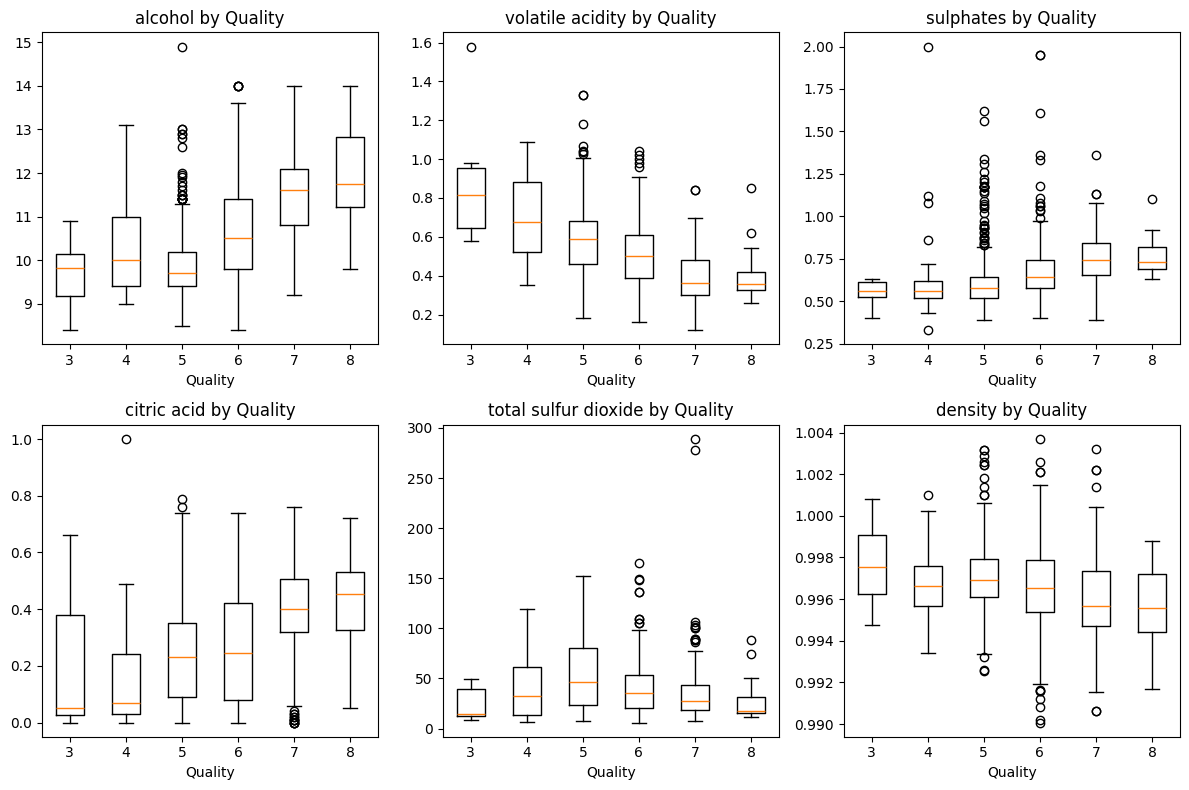

In [53]:
plt.figure(figsize=(12,8))
for i, feat in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    # collect data for each quality
    data_to_plot = [df[df['quality'] == q][feat].values for q in sorted(df['quality'].unique())]
    plt.boxplot(data_to_plot, labels=sorted(df['quality'].unique()))
    plt.title(f'{feat} by Quality')
    plt.xlabel('Quality')
plt.tight_layout()
plt.show()

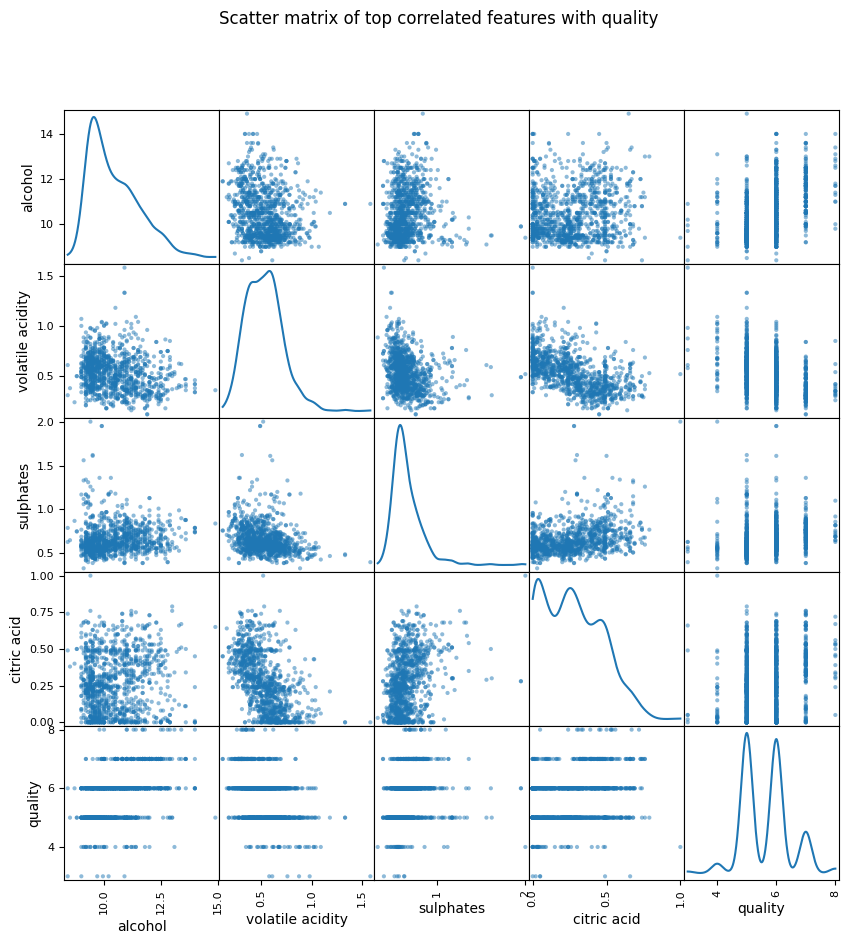

In [54]:
from pandas.plotting import scatter_matrix
sm_feats = top_features[:4] + ['quality']
scatter_matrix(df[sm_feats], figsize=(10,10), diagonal='kde')
plt.suptitle('Scatter matrix of top correlated features with quality')
plt.show()

Preparing data for modeling

In [55]:
X = df.drop(columns=['quality'])
y = df['quality']

Train - Test Split

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [57]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


MODELS

In [58]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
sgd = SGDClassifier(loss='log_loss', max_iter=5000, tol=1e-3, random_state=42)
svc = SVC(kernel='rbf', probability=True, random_state=42)

Training Random Forest

In [59]:
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

Training SGD(Stochastic Gradient Descent)

In [60]:
sgd.fit(X_train_scaled, y_train)
y_pred_sgd = sgd.predict(X_test_scaled)
acc_sgd = accuracy_score(y_test, y_pred_sgd)

Training SVC(Support Vector Classifier )

In [61]:
svc.fit(X_train_scaled, y_train)
y_pred_svc = svc.predict(X_test_scaled)
acc_svc = accuracy_score(y_test, y_pred_svc)

In [62]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores_rf = cross_val_score(rf, X, y, cv=cv)
cv_scores_sgd = cross_val_score(sgd, scaler.fit_transform(X), y, cv=cv)
cv_scores_svc = cross_val_score(svc, scaler.fit_transform(X), y, cv=cv)

In [63]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

OUTPUTS

In [64]:
print("\n=== CORRELATION WITH QUALITY ===")
display(corr_with_quality)


=== CORRELATION WITH QUALITY ===


alcohol                 0.484866
volatile acidity        0.407394
sulphates               0.257710
citric acid             0.240821
total sulfur dioxide    0.183339
density                 0.175208
chlorides               0.124085
fixed acidity           0.121970
free sulfur dioxide     0.063260
pH                      0.052453
residual sugar          0.022002
Name: quality, dtype: float64

In [65]:
print("\n=== MODEL ACCURACIES (test set) ===")
print(f"Random Forest test accuracy: {acc_rf:.4f}")
print(f"SGD (log) test accuracy:     {acc_sgd:.4f}")
print(f"SVC (RBF) test accuracy:     {acc_svc:.4f}")


=== MODEL ACCURACIES (test set) ===
Random Forest test accuracy: 0.7162
SGD (log) test accuracy:     0.5677
SVC (RBF) test accuracy:     0.6681


In [66]:
print("\n=== RANDOM FOREST FEATURE IMPORTANCES ===")
display(feat_importances)


=== RANDOM FOREST FEATURE IMPORTANCES ===


alcohol                 0.146472
sulphates               0.116319
volatile acidity        0.108427
total sulfur dioxide    0.098369
density                 0.087165
pH                      0.079382
chlorides               0.078858
fixed acidity           0.077430
citric acid             0.076842
residual sugar          0.065683
free sulfur dioxide     0.065053
dtype: float64

In [67]:
print("\n=== CLASSIFICATION REPORTS ===")
print("Random Forest:\n", classification_report(y_test, y_pred_rf))
print("SGD:\n", classification_report(y_test, y_pred_sgd))
print("SVC:\n", classification_report(y_test, y_pred_svc))



=== CLASSIFICATION REPORTS ===
Random Forest:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.86      0.79        97
           6       0.69      0.73      0.71        92
           7       0.70      0.48      0.57        29
           8       0.00      0.00      0.00         3

    accuracy                           0.72       229
   macro avg       0.36      0.34      0.35       229
weighted avg       0.68      0.72      0.69       229

SGD:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.69      0.75      0.72        97
           6       0.56      0.42      0.48        92
           7       0.35      0.62      0.45        29
           8       0.00      0.00      0.00         3

    accuracy           

C:\Users\Gaurav\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Gaurav\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\Gaurav\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

In [68]:
print("\n=== CONFUSION MATRICES ===")
print("Random Forest:\n", confusion_matrix(y_test, y_pred_rf))
print("SGD:\n", confusion_matrix(y_test, y_pred_sgd))
print("SVC:\n", confusion_matrix(y_test, y_pred_svc))


=== CONFUSION MATRICES ===
Random Forest:
 [[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 83 13  1  0]
 [ 0  0 21 67  4  0]
 [ 0  0  3 12 14  0]
 [ 0  0  0  2  1  0]]
SGD:
 [[ 0  0  1  0  0  0]
 [ 0  0  3  4  0  0]
 [ 1  0 73 18  5  0]
 [ 0  1 27 39 25  0]
 [ 0  0  2  9 18  0]
 [ 0  0  0  0  3  0]]
SVC:
 [[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 78 19  0  0]
 [ 0  0 22 66  4  0]
 [ 0  0  2 18  9  0]
 [ 0  0  0  3  0  0]]
